<img src = excelrlogo.png/>

### ASSIGNMENT-14-DECISION TREES

#### PROBLEM STATEMENT -- Fraud_check

#### LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [2]:
Fraud_check = pd.read_csv("Fraud_check.csv")
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


#### TAKE BASIC INFORMATION FROM THE DATA

In [3]:
Fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
Fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


#### KNOW LAST 5 COLUMNS

In [5]:
Fraud_check.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [6]:
Fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

#### Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable

In [7]:
Fraud_check = pd.get_dummies(Fraud_check,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [8]:
Fraud_check["TaxInc"] = pd.cut(Fraud_check["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
Fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,Good
596,69967,55369,2,1,0,0,1,Good
597,47334,154058,0,0,0,0,1,Good
598,98592,180083,17,1,1,0,0,Good


In [9]:
Fraud_check = pd.get_dummies(Fraud_check,columns = ["TaxInc"],drop_first=True)

In [10]:
Fraud_check.tail()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


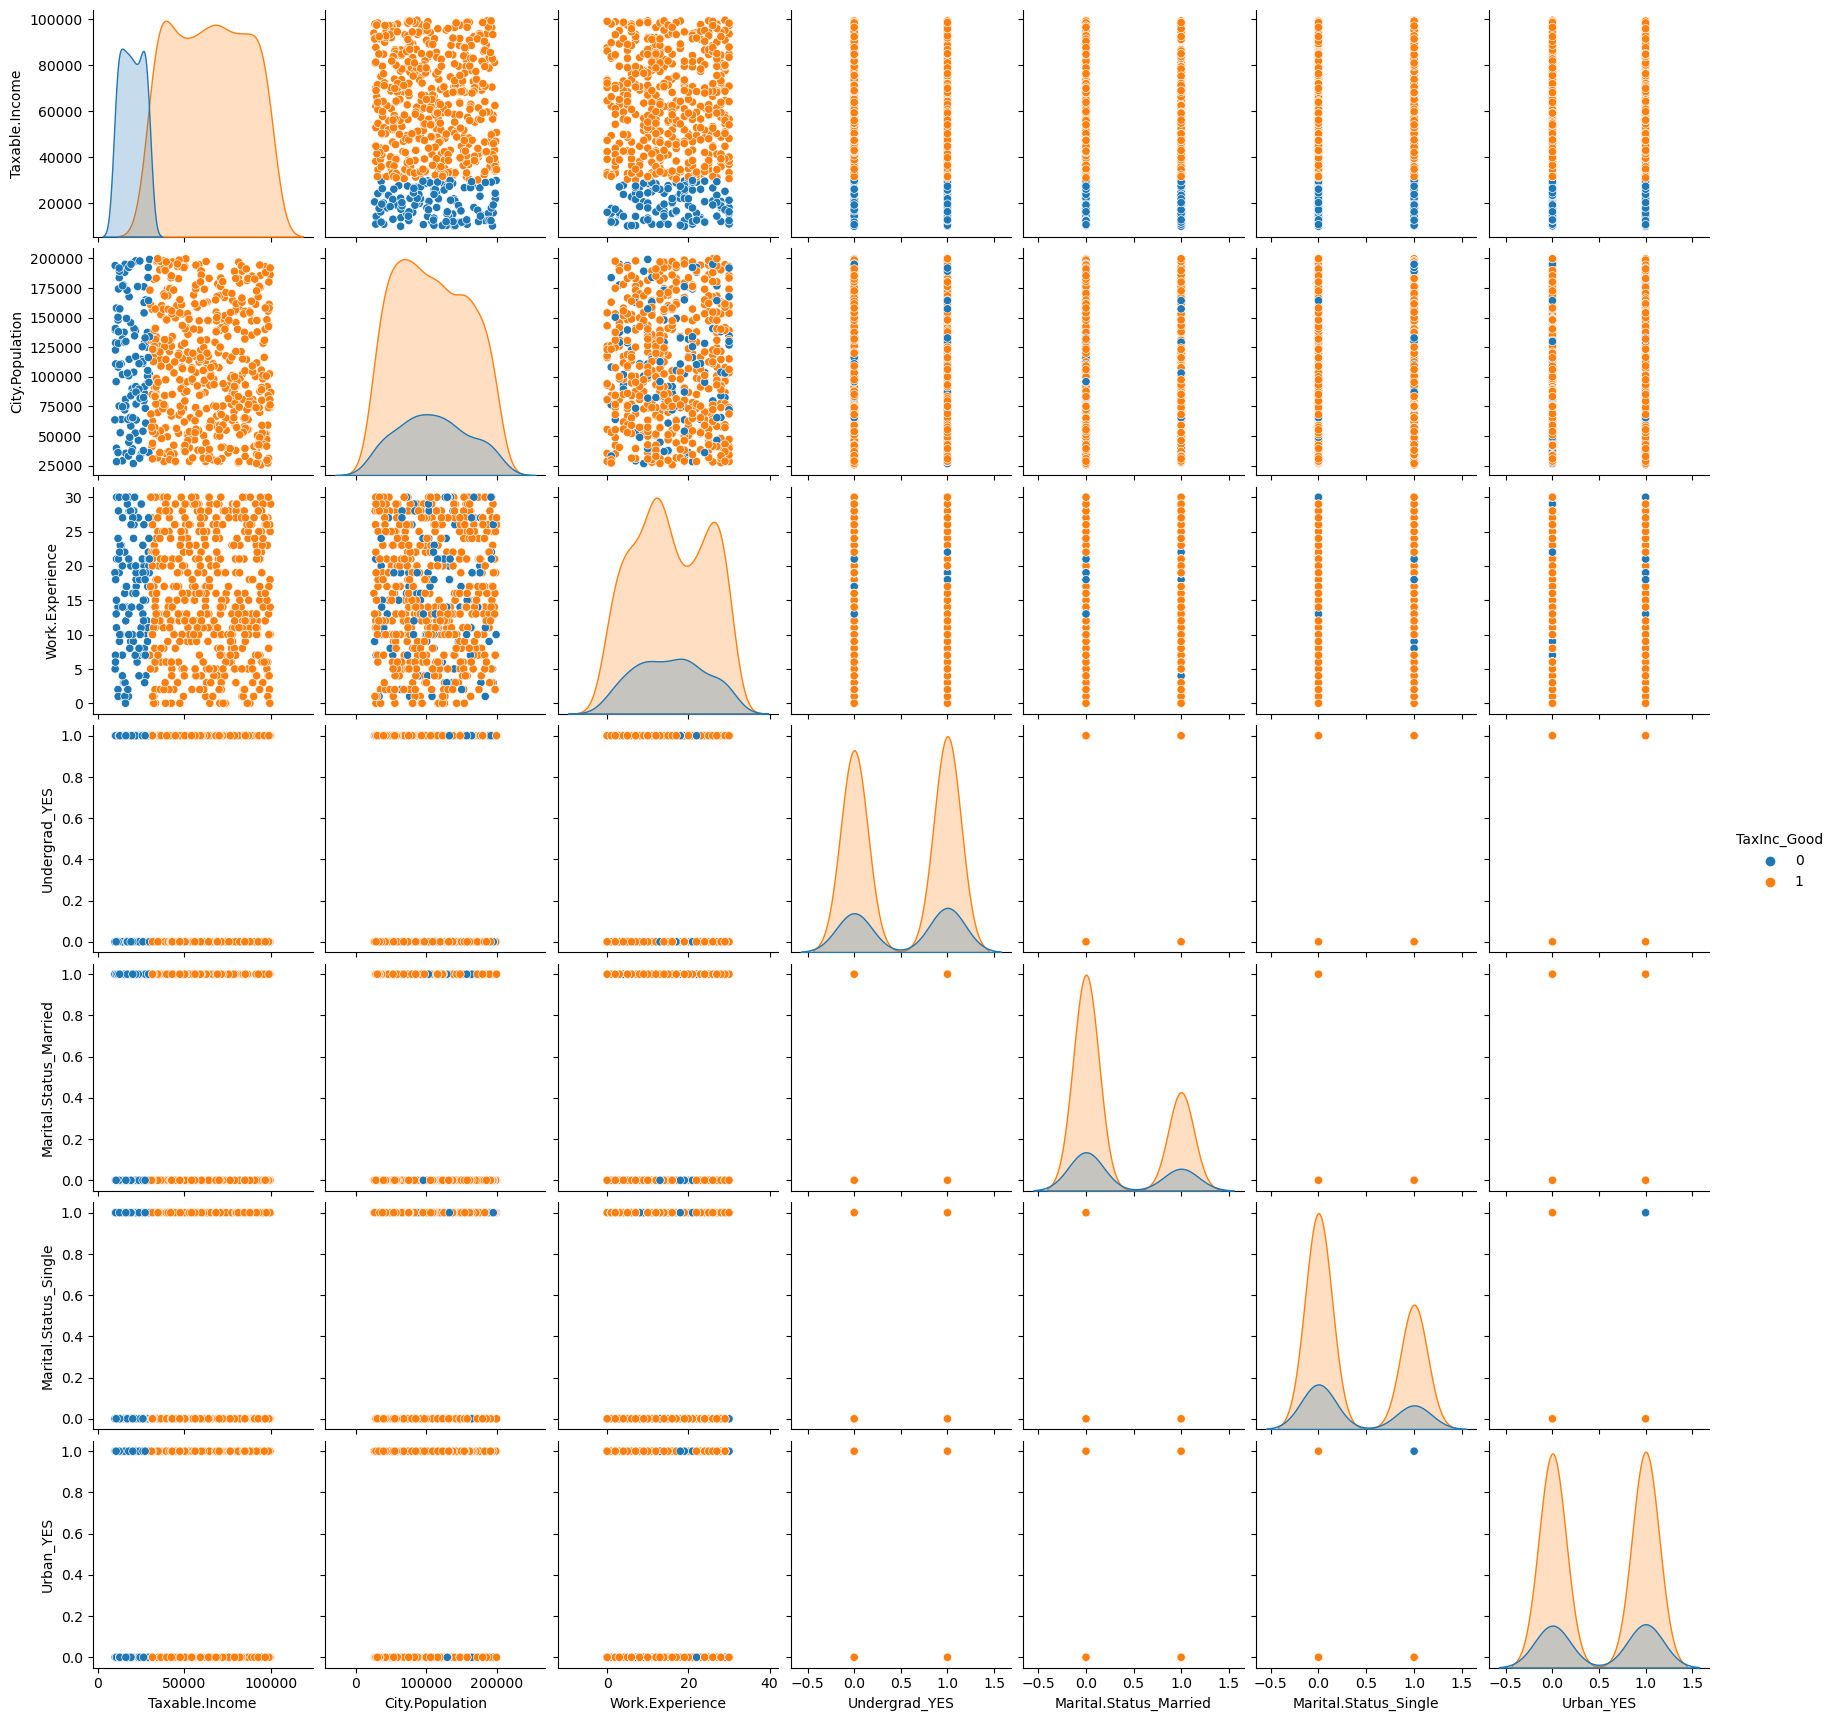

In [11]:
import seaborn as sns
sns.pairplot(data = Fraud_check, hue = 'TaxInc_Good')

#### Normalization function 

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
Fraud_check_norm = norm_func(Fraud_check.iloc[:,1:])
Fraud_check_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [14]:
X = Fraud_check_norm.drop(['TaxInc_Good'], axis=1)
y = Fraud_check_norm['TaxInc_Good']

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
Fraud_check_norm["income"]="<=30000"
Fraud_check_norm.loc[Fraud_check["Taxable.Income"]>=30000,"income"]="Good"
Fraud_check_norm.loc[Fraud_check["Taxable.Income"]<=30000,"income"]="Risky"

In [17]:
Fraud_check.drop(["Taxable.Income"],axis=1,inplace=True)

In [18]:
Fraud_check.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [19]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in Fraud_check.columns:
    if Fraud_check[column_name].dtype == object:
        Fraud_check[column_name] = le.fit_transform(Fraud_check[column_name])
    else:
        pass

In [20]:
features = Fraud_check.iloc[:,0:5]
labels = Fraud_check.iloc[:,5]

In [21]:
colnames = list(Fraud_check.columns)
predictors = colnames[0:5]
target = colnames[5]

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

#### MODEL BUILDING

In [23]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [24]:
from sklearn.tree import  DecisionTreeClassifier
model.estimators_
model.classes_
model.n_classes_

2

In [25]:
model.n_outputs_

1

In [26]:
model.oob_score_

0.4895833333333333

In [27]:
from sklearn.metrics import accuracy_score
prediction = model.predict(x_train)
accuracy = accuracy_score(y_train,prediction)

In [28]:
np.mean(prediction == y_train)

0.9895833333333334

In [29]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [30]:
pred_test = model.predict(x_test)

In [31]:
acc_test =accuracy_score(y_test,pred_test)

In [32]:
!pip install pydotplus

In [33]:
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [34]:
tree = model.estimators_[5]

In [35]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [36]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#### Building Decision Tree Classifier using Entropy Criteria

In [37]:
model_build = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model_build.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
estimator = model.estimators_[0]

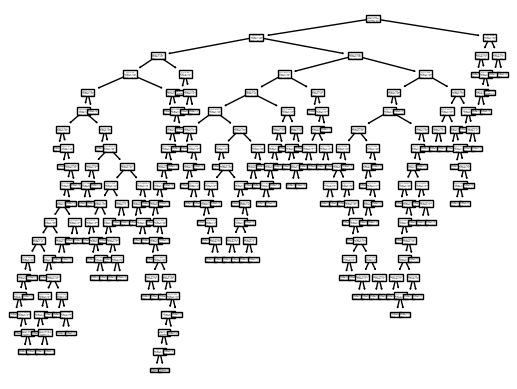

In [40]:
tree.plot_tree(estimator);

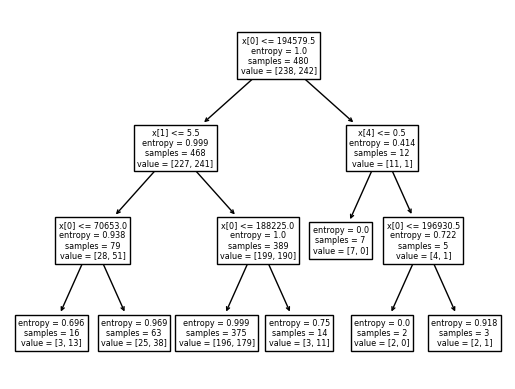

In [43]:
from sklearn import tree
tree.plot_tree(model_build);

In [44]:
colnames = list(Fraud_check.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

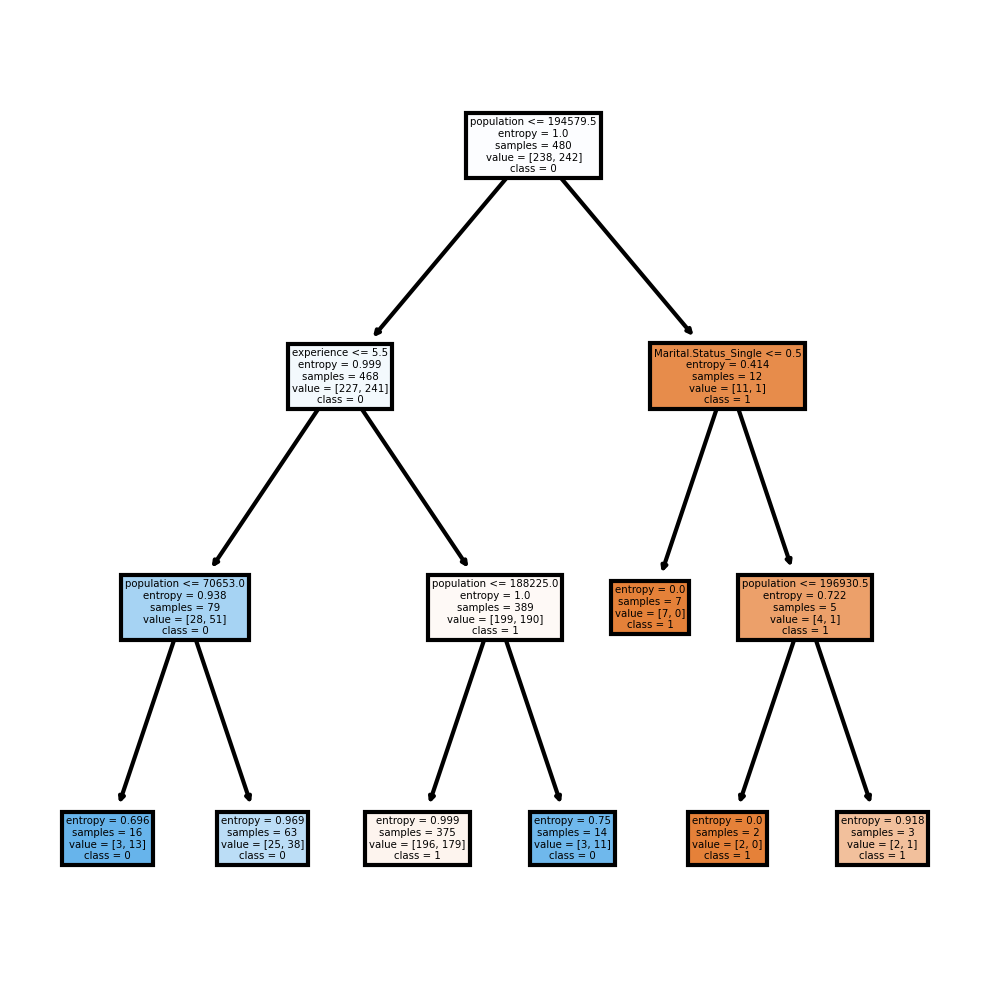

In [47]:
import matplotlib.pyplot as plt
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_build,
               feature_names = fn, 
               class_names=cn,
               filled = True);

#### Predicting on test data

In [50]:
predictions = model_build.predict(x_test) 
pd.Series(preds).value_counts()

0    99
1    21
dtype: int64

In [51]:
predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [52]:
pd.crosstab(y_test,predictions)

col_0,0,1
Urban_YES,,
0,51,9
1,48,12


In [53]:
np.mean(predictions==y_test)

0.525

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [56]:
from sklearn.tree import DecisionTreeClassifier
model_build_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_build_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [58]:
pred = model_build.predict(x_test)
np.mean(predictions==y_test)

0.525

In [59]:
from sklearn.tree import DecisionTreeRegressor
array = Fraud_check.values
X = array[:,0:3]
y = array[:,3]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model_build = DecisionTreeRegressor()
model_build.fit(X_train, y_train)

DecisionTreeRegressor()

In [61]:
model_build.score(X_test,y_test)

-0.8701026119402988

### CONCLUSION

The problem statement involves building a decision tree model to classify individuals as "Risky" or "Good" based on their taxable income, where those with income less than or equal to 30,000 are considered "Risky".

Here's a brief overview of the steps I've performed:
>>> 
- Loaded the dataset and conducted basic exploratory data analysis (EDA) including information, description, and checking for null values.
+ Created dummy variables for categorical features.
- Applied a normalization function.
+ Split the data into training and testing sets.
- Mapped taxable income to 'Risky' and 'Good' categories.
+ Encoded categorical variables.
- Built a Random Forest classifier and a Decision Tree classifier with entropy criterion.
+ Visualized a decision tree.
- Calculated accuracy and confusion matrix.
+ Installed and used pydotplus for visualizing a decision tree.
- Built a Decision Tree classifier with Gini criterion.
+ Also performed Decision Tree Regression.

### Thank You!